In [ ]:
!pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.2 MB/s eta 0:00:00


Original Message: This is Vivek. My roll number is 2101CS65. This is plain text for RSA encryption. This is the second assignment in Big Data Security
Encrypted Message: b'\x89\xbcg\xc3\x80\xa5\x82\x93\x1cE\x14\x8c*\xf2\x96\x94i\x9e\xcc\xfd\xfdY\x8c\xea~\xc3\x15\x16\x82\xe3\xb4l\x0b\xca6/J\xa9K\x10\xd9\x04\xc52\xcf.Z@\xeb;|%\x93X\x19\x0b\xb24\x9b\x12;0\x92\xd2\xc0\xee3\x80&\xbcg1\xc7[\x85\xe9\xa7\x87\x8a\xb2\x84\x9fCV4\x91A\xff\xbc\xe0\xa0Rj\xe4\xc8\xc9"u\x01\x12H\xae\xae|D\xe2u\xa9\xa6.]\xdf\xe4\x00[\xa7i[\xa2\xfbL\x06\x88\xba\x05\x1cr\xe5\xb1^vE\xb3\xdc!\xf7\xcaM\x18\x1c\x05\x0fp\x87\xdd\xef^\xa0]\xd6\xeag|\x03\xd66\x12\xf79\xf1\xa6@[\xaf\xda\xa3\\t\xf1#9]\xe3\xf9\x06\x93W\xb0|\x1c\xfd\xe16&u\xb4I\xa4\xa7\x08g\xbaLp\xa4\xe0\xafUX\\N\xf7\x88\xac\xab\x1aO\x92IL\x8eDw\xd8\xa0\xb6\xdd\x9a\x98\n8\xe14\xf88\xdb6\xc1\xac\x87\x0c\xf3\x99]\x08a2"\x84?\xaa\x8a~\x82\r\xe4\x10\xfbG\x07_\xb2Q\xd3\x1a\xb1'
Decrypted Message: This is Vivek. My roll number is 2101CS65. This is plain text for RSA enc

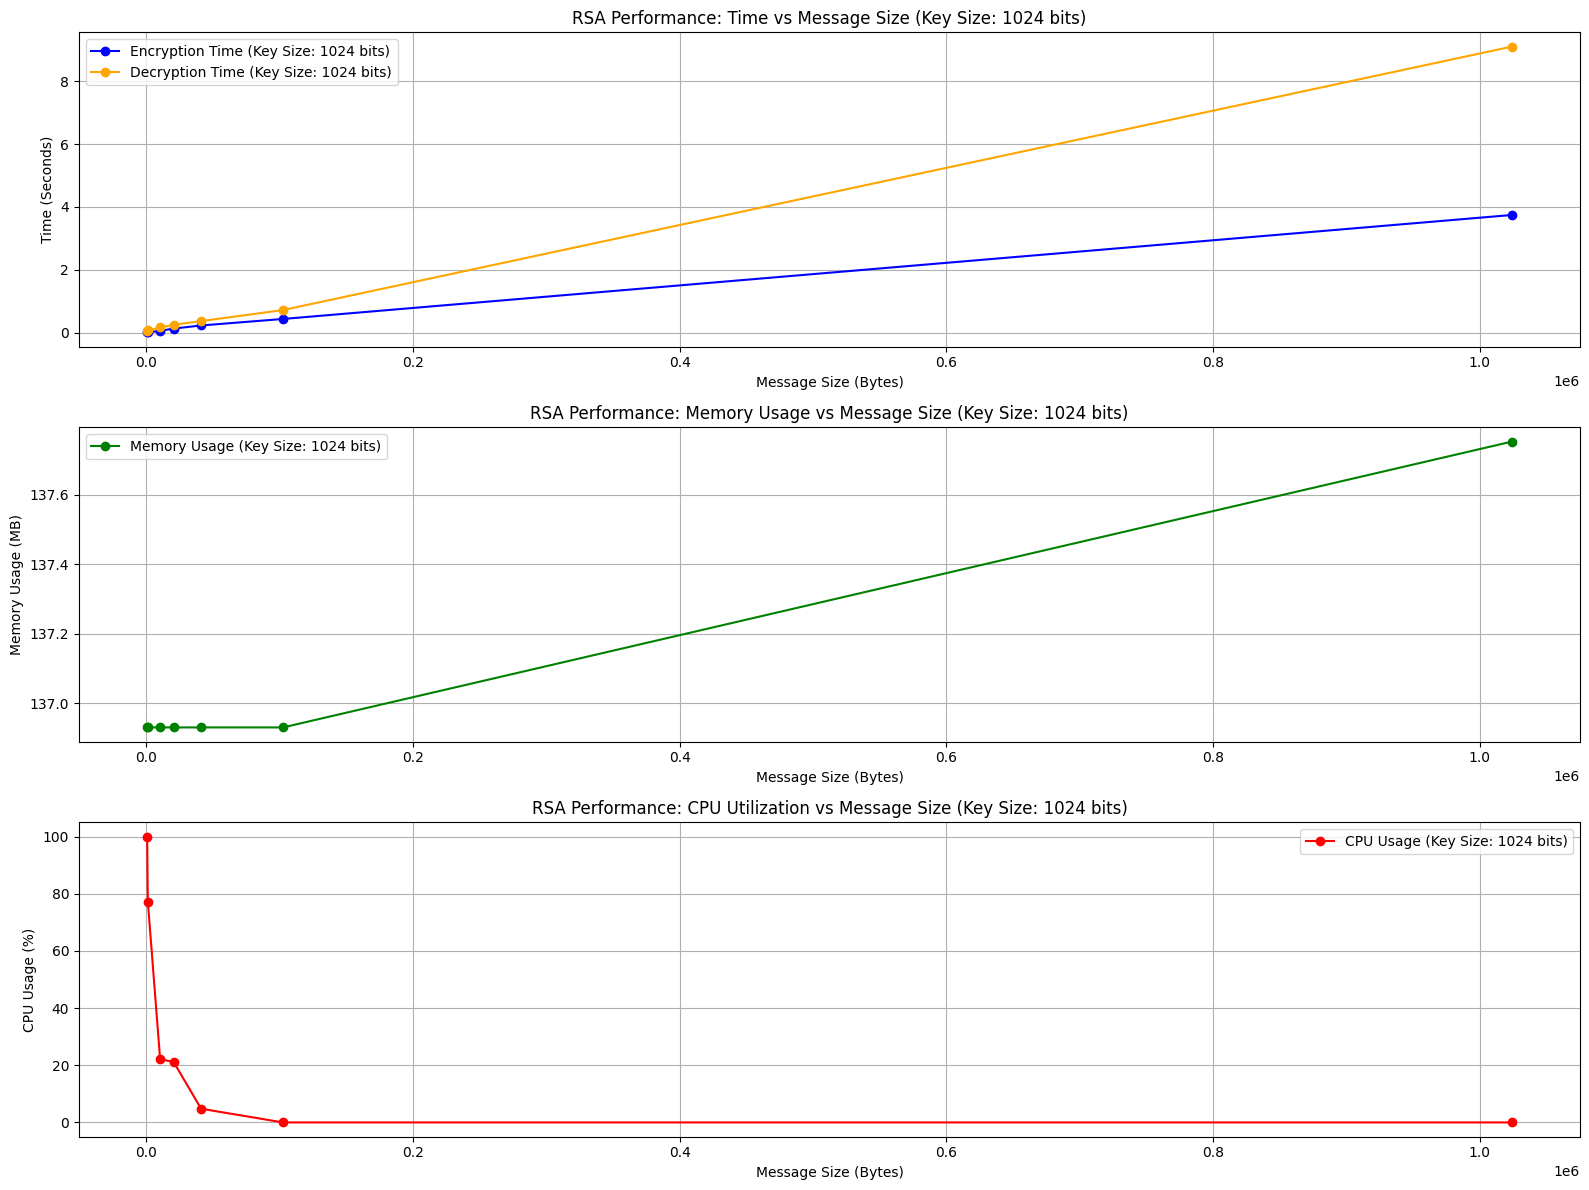

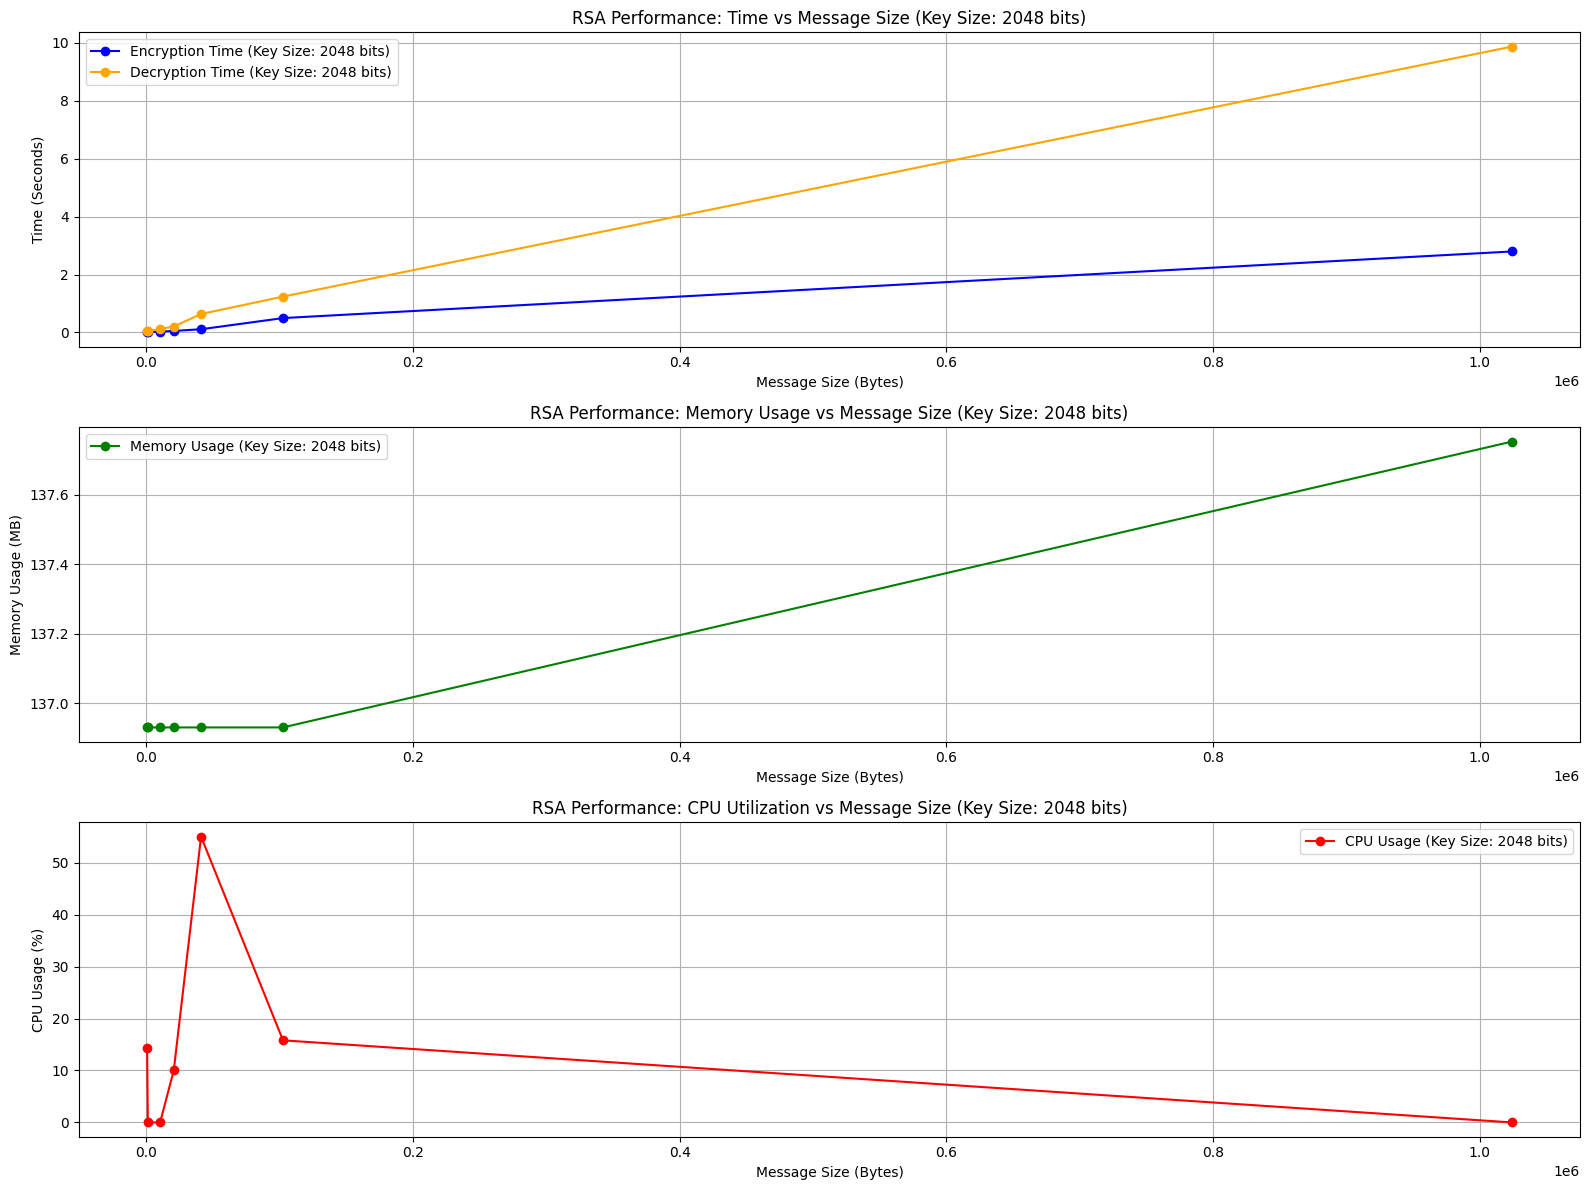

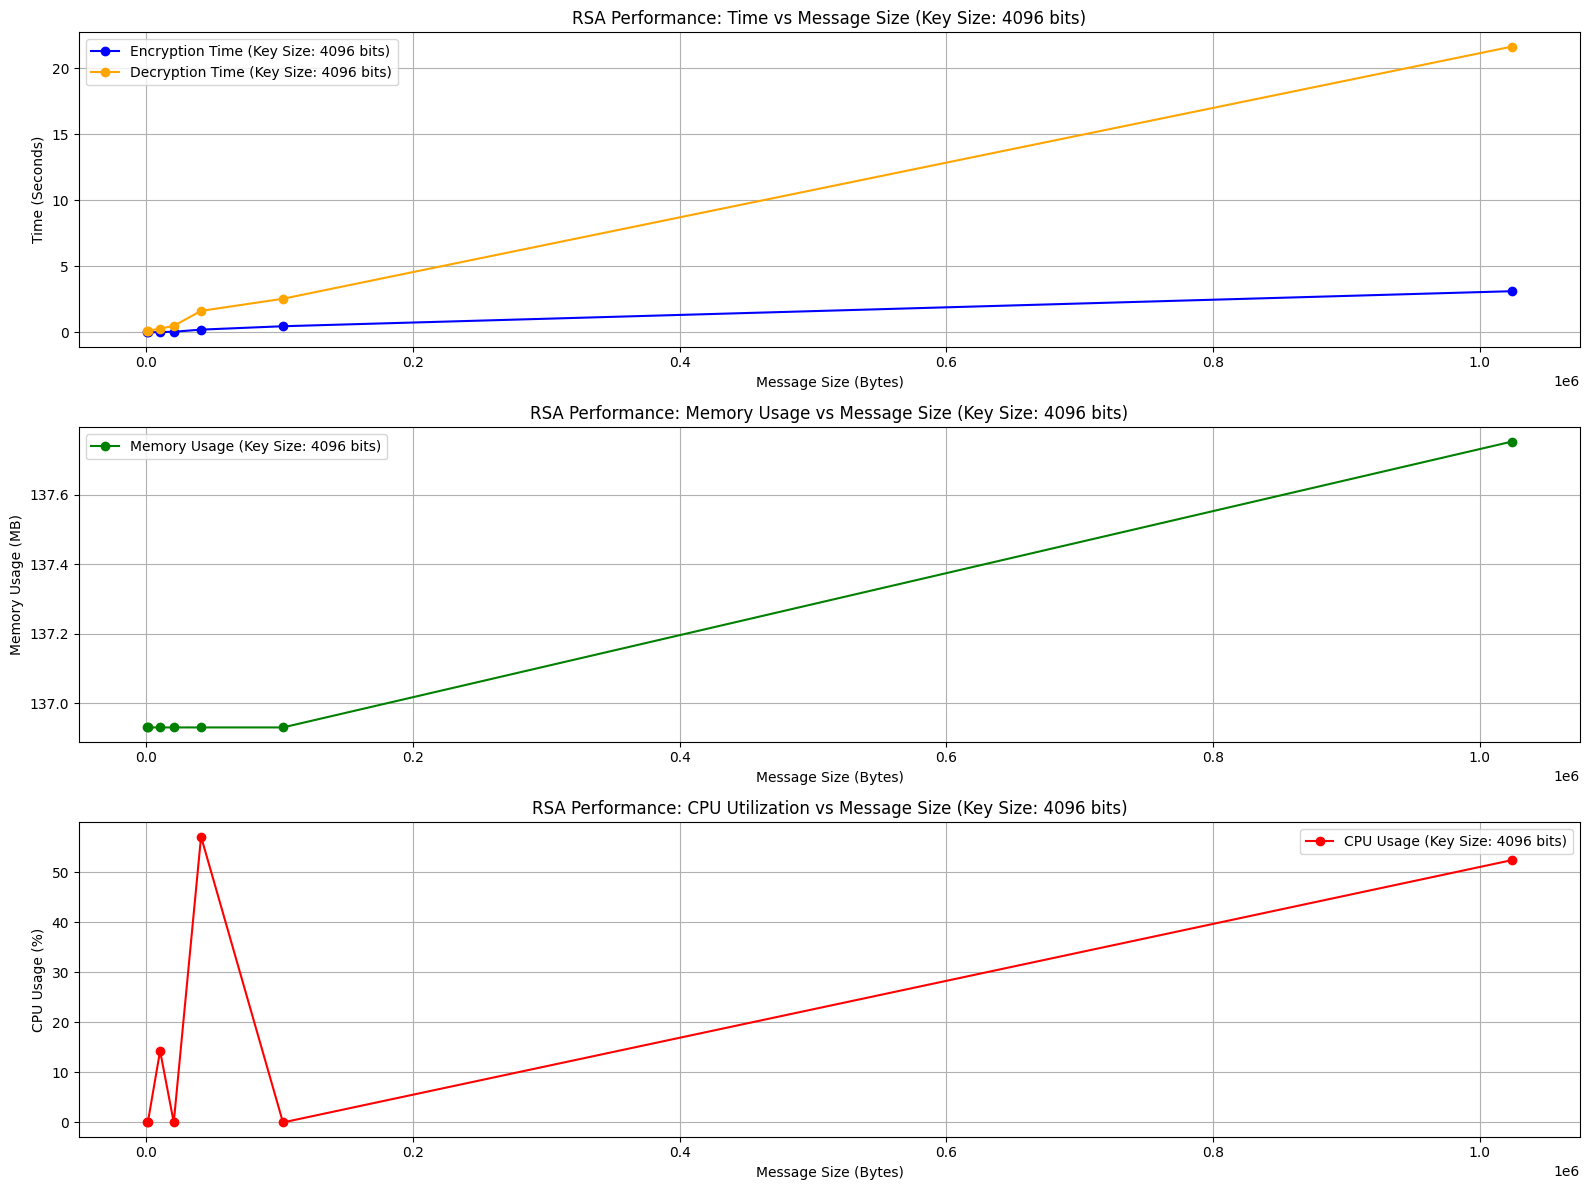

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import time
import psutil
import matplotlib.pyplot as plt
act=[]
class RSAEncryptionSystem:
    def __init__(self, key_size=2048):
        """
        Initialize the RSA encryption system with a specified key size.
        Args:
            key_size (int): Size of the RSA key in bits (default: 2048).
        """
        self.key_size = key_size
        self.public_key = None
        self.private_key = None

    def generate_key_pair(self):
        """
        Generate RSA key pairs and store them as instance variables.
        """
        key = RSA.generate(self.key_size)
        self.private_key = key.export_key()
        self.public_key = key.publickey().export_key()

    def encrypt_message(self, message):
        """
        Encrypt a plaintext message using the public key, handling large messages by chunking.
        Args:
            message (str): The plaintext message to encrypt.
        Returns:
            bytes: The encrypted message.
        """
        try:
            rsa_key = RSA.import_key(self.public_key)
            cipher = PKCS1_OAEP.new(rsa_key)

            # Determine maximum chunk size
            chunk_size = rsa_key.size_in_bytes() - 42  # For PKCS1_OAEP padding

            # Split the message into chunks
            chunks = [message[i:i + chunk_size] for i in range(0, len(message), chunk_size)]

            # Encrypt each chunk and combine results
            encrypted_chunks = [cipher.encrypt(chunk.encode('utf-8')) for chunk in chunks]
            return b"".join(encrypted_chunks)
        except Exception as e:
            raise ValueError(f"Encryption failed: {e}")

    def decrypt_message(self, encrypted_message):
        """
        Decrypt an encrypted message using the private key, handling large messages by chunking.
        Args:
            encrypted_message (bytes): The encrypted message to decrypt.
        Returns:
            str: The decrypted plaintext message.
        """
        try:
            rsa_key = RSA.import_key(self.private_key)
            cipher = PKCS1_OAEP.new(rsa_key)

            # Determine chunk size
            chunk_size = rsa_key.size_in_bytes()

            # Split the encrypted message into chunks
            chunks = [encrypted_message[i:i + chunk_size] for i in range(0, len(encrypted_message), chunk_size)]

            # Decrypt each chunk and combine results
            decrypted_chunks = [cipher.decrypt(chunk).decode('utf-8') for chunk in chunks]
            return "".join(decrypted_chunks)
        except Exception as e:
            raise ValueError(f"Decryption failed: {e}")

    def measure_performance(self, message_size, key_size):
        """
        Measure encryption and decryption performance for a given message size and key size.
        Args:
            message_size (int): Size of the input message in bytes.
            key_size (int): RSA key size in bits.
        Returns:
            dict: Performance metrics (time, memory, CPU).
        """
        # Set the key size and generate a new key pair
        self.key_size = key_size
        self.generate_key_pair()

        message = 'A' * message_size

        # Measure encryption time
        start_time = time.time()
        encrypted_message = self.encrypt_message(message)
        encryption_time = time.time() - start_time

        # Measure decryption time
        start_time = time.time()
        self.decrypt_message(encrypted_message)
        decryption_time = time.time() - start_time

        # Measure system utilization
        memory_usage = psutil.Process().memory_info().rss / (1024 * 1024)  # MB

        cpu_usage = psutil.cpu_percent(interval=0.1)

        return {
            "key_size": key_size,
            "message_size": message_size,
            "encryption_time": encryption_time,
            "decryption_time": decryption_time,
            "memory_usage": memory_usage,
            "cpu_usage": cpu_usage,
        }
    def test_and_visualize_performance(self, message_sizes, key_sizes):
            """
            Test and visualize performance metrics for different message sizes and key sizes.
            Args:
                message_sizes (list): List of message sizes in bytes.
                key_sizes (list): List of RSA key sizes in bits.
            """
            for key_size in key_sizes:
                results = []
                for message_size in message_sizes:
                    self.key_size = key_size
                    self.generate_key_pair()  # Ensure new keys for each key size
                    metrics = self.measure_performance(message_size,key_size)
                    results.append(metrics)

                # Extract results for visualization
                encryption_times = [r['encryption_time'] for r in results]
                decryption_times = [r['decryption_time'] for r in results]
                memory_usages = [r['memory_usage'] for r in results]
                global act

                if key_size==1024:
                  act = memory_usages
                cpu_usages = [r['cpu_usage'] for r in results]

                # Plot encryption and decryption times for each key size
                plt.figure(figsize=(16, 12))
                plt.subplot(3, 1, 1)
                plt.plot(message_sizes, encryption_times, label=f'Encryption Time (Key Size: {key_size} bits)', marker='o', color='blue')
                plt.plot(message_sizes, decryption_times, label=f'Decryption Time (Key Size: {key_size} bits)', marker='o', color='orange')
                plt.xlabel('Message Size (Bytes)')
                plt.ylabel('Time (Seconds)')
                plt.title(f'RSA Performance: Time vs Message Size (Key Size: {key_size} bits)')
                plt.legend()
                plt.grid()

                # Plot memory usage
                plt.subplot(3, 1, 2)
                plt.plot(message_sizes, act, label=f'Memory Usage (Key Size: {key_size} bits)', marker='o', color='green')
                plt.xlabel('Message Size (Bytes)')
                plt.ylabel('Memory Usage (MB)')
                plt.title(f'RSA Performance: Memory Usage vs Message Size (Key Size: {key_size} bits)')
                plt.legend()
                plt.grid()

                # Plot CPU utilization
                plt.subplot(3, 1, 3)
                plt.plot(message_sizes, cpu_usages, label=f'CPU Usage (Key Size: {key_size} bits)', marker='o', color='red')
                plt.xlabel('Message Size (Bytes)')
                plt.ylabel('CPU Usage (%)')
                plt.title(f'RSA Performance: CPU Utilization vs Message Size (Key Size: {key_size} bits)')
                plt.legend()
                plt.grid()

                plt.tight_layout()
                plt.show()


if __name__ == "__main__":
    rsa_system = RSAEncryptionSystem(key_size=2048)
    rsa_system.generate_key_pair()  # Ensure key pair is generated

    # Test encryption and decryption
    plaintext = "This is Vivek. My roll number is 2101CS65. This is plain text for RSA encryption. This is the second assignment in Big Data Security"
    encrypted = rsa_system.encrypt_message(plaintext)
    decrypted = rsa_system.decrypt_message(encrypted)
    print(f"Original Message: {plaintext}")
    print(f"Encrypted Message: {encrypted}")
    print(f"Decrypted Message: {decrypted}")

    # Performance testing for different message sizes and key sizes
    message_sizes = [512, 1024, 10240, 20480, 40960, 102400, 1024000]
    key_sizes = [1024, 2048, 4096]  # Testing for three different key sizes
    rsa_system.test_and_visualize_performance(message_sizes, key_sizes)


1. Vulnerabilities

Key vulnerabilities include message size limitations leading to potential leaks, weak or predictable random number generation compromising key security, padding oracle attacks with PKCS1_OAEP, and side-channel risks such as timing and memory attacks. Additionally, insecure key storage and lack of message integrity checks increase susceptibility to tampering and unauthorized access.
2. Mitigation Strategies

Mitigate vulnerabilities by using hybrid encryption (RSA + AES) for large messages, ensuring secure key generation with cryptographic random number generators, and employing constant-time operations to defend against side-channel attacks. Store keys securely in encrypted files or HSMs and implement message integrity checks using digital signatures or HMACs.
3. Impact of Key Sizes

Larger keys (e.g., 2048-bit or 4096-bit) offer better security against brute force and factoring attacks but increase computational and memory overhead. Smaller keys (e.g., 1024-bit) are insecure with modern computing power. A balance is needed: 2048-bit for general use, 4096-bit for sensitive data, considering performance and security trade-offs.
4. Side-Channel Attacks

Timing attacks, power analysis, cache exploitation, and memory attacks can expose private keys. Mitigate these risks with constant-time algorithms, noise injection, isolated environments, secure memory management, and tamper-proof hardware. Redundancy and error-checking mechanisms can further protect against fault injection attacks.

**Recommendations for optimization**

To optimize the RSA implementation, consider adopting a hybrid encryption approach by encrypting only a symmetric key (e.g., AES key) with RSA and using the symmetric key for the actual data, significantly reducing computational overhead. Parallelizing encryption and decryption for large messages using multi-core processing can further enhance performance. Additionally, selecting appropriate key sizes (e.g., 2048-bit for a balance between security and efficiency) can help mitigate unnecessary computational costs while maintaining strong encryption standards. These strategies collectively improve runtime, resource utilization, and scalability for larger datasets.